# Classification of Office Occupancy

https://archive.ics.uci.edu/dataset/357/occupancy+detection

Author
ShuCheng (Bernie) Chen

Coding Assistance from OpenAI (2024). ChatGPT (Jul 5 version) [Large language model]. https://chat.openai.com/chat

## Environment Setup

In [ ]:
%pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split

# fetch dataset
occupancy_detection = fetch_ucirepo(id=357)

# data (as pandas dataframes)
X = occupancy_detection.data.features
y = occupancy_detection.data.targets

# metadata
print(occupancy_detection.metadata)

# variable information
print(occupancy_detection.variables)


{'uci_id': 357, 'name': 'Occupancy Detection ', 'repository_url': 'https://archive.ics.uci.edu/dataset/357/occupancy+detection', 'data_url': 'https://archive.ics.uci.edu/static/public/357/data.csv', 'abstract': 'Experimental data used for binary classification (room occupancy) from Temperature,Humidity,Light and CO2. Ground-truth occupancy was obtained from time stamped pictures that were taken every minute.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 20560, 'num_features': 6, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Occupancy'], 'index_col': ['id'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2016, 'last_updated': 'Sat Apr 13 2024', 'dataset_doi': '10.24432/C5X01N', 'creators': ['Luis Candanedo'], 'intro_paper': {'title': 'Accurate occupancy detection of an office room from light, temperature, humidity and CO2 measurements using statistic

## Data Exploration

In [ ]:
df = pd.concat([X, y], axis=1)
df

date Temperature Humidity   Light      CO2  \
0      2015-02-04 17:51:00       23.18   27.272     426   721.25   
1      2015-02-04 17:51:59       23.15  27.2675   429.5      714   
2      2015-02-04 17:53:00       23.15   27.245     426    713.5   
3      2015-02-04 17:54:00       23.15     27.2     426   708.25   
4      2015-02-04 17:55:00        23.1     27.2     426    704.5   
...                    ...         ...      ...     ...      ...   
20557  2015-02-18 09:15:00      20.815  27.7175  429.75  1505.25   
20558  2015-02-18 09:16:00      20.865   27.745   423.5   1514.5   
20559  2015-02-18 09:16:59       20.89   27.745   423.5   1521.5   
20560  2015-02-18 09:17:59       20.89  28.0225  418.75     1632   
20561  2015-02-18 09:19:00          21     28.1     409     1864   

             HumidityRatio  Occupancy  
0      0.00479298817650529        1.0  
1      0.00478344094931065        1.0  
2      0.00477946352442199        1.0  
3      0.00477150882608175        1.0  
4      0.00475699293331518        1.0  
...                    ...        ...  
20557  0.00421296819328694        1.0  
20558  0.00423026193160229        1.0  
20559  0.00423681810140671        1.0  
20560   0.0042794854718673        1.0  
20561  0.00432073200293677        1.0  

[20562 rows x 7 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20562 entries, 0 to 20561
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20562 non-null  object 
 1   Temperature    20562 non-null  object 
 2   Humidity       20562 non-null  object 
 3   Light          20562 non-null  object 
 4   CO2            20562 non-null  object 
 5   HumidityRatio  20562 non-null  object 
 6   Occupancy      20560 non-null  float64
dtypes: float64(1), object(6)
memory usage: 1.1+ MB


In [ ]:
# Load the dataset
data = df.copy()

# Convert columns to numeric types with error handling
columns_to_convert = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']

for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Check for and handle any remaining NaN values
print(data.isnull().sum())

# Drop rows with NaN values
data.dropna(inplace=True)

# Convert date-time to datetime object and extract features
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data = data.dropna(subset=['date'])

data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['hour'] = data['date'].dt.hour
data['minute'] = data['date'].dt.minute
data['second'] = data['date'].dt.second
data['day_of_week'] = data['date'].dt.dayofweek

# Drop the original date column
data.drop('date', axis=1, inplace=True)

# Define features and labels
X = data.drop(['Occupancy'], axis=1)
y = data['Occupancy']

# Split the data into training and test sets
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X, y, test_size=0.5, random_state=42)

# Apply RandomOverSampler to balance the training set
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_0, y_train_0 = ros.fit_resample(X_train_0, y_train_0)

# Print the shape of the resampled data
print("data:", data.shape, "X_train:", X_train_0.shape, "y_test:", y_test_0.shape)

X_train_0.head()

date             0
Temperature      2
Humidity         2
Light            2
CO2              2
HumidityRatio    2
Occupancy        2
dtype: int64
data: (20560, 13) X_train: (15734, 12) y_test: (10280,)


Temperature   Humidity       Light         CO2  HumidityRatio  year  month  \
0       20.100  32.200000    0.000000  566.000000       0.004687  2015      2   
1       19.700  37.200000    0.000000  502.000000       0.005287  2015      2   
2       19.000  31.390000    0.000000  439.000000       0.004264  2015      2   
3       20.675  35.240000   48.500000  498.250000       0.005320  2015      2   
4       21.200  21.066667  449.333333  789.666667       0.003274  2015      2   

   day  hour  minute  second  day_of_week  
0   15     5      25       0            6  
1   14     8      12       0            5  
2    8     7      28      59            6  
3   14    11      34       0            5  
4    6     9      40       0            4

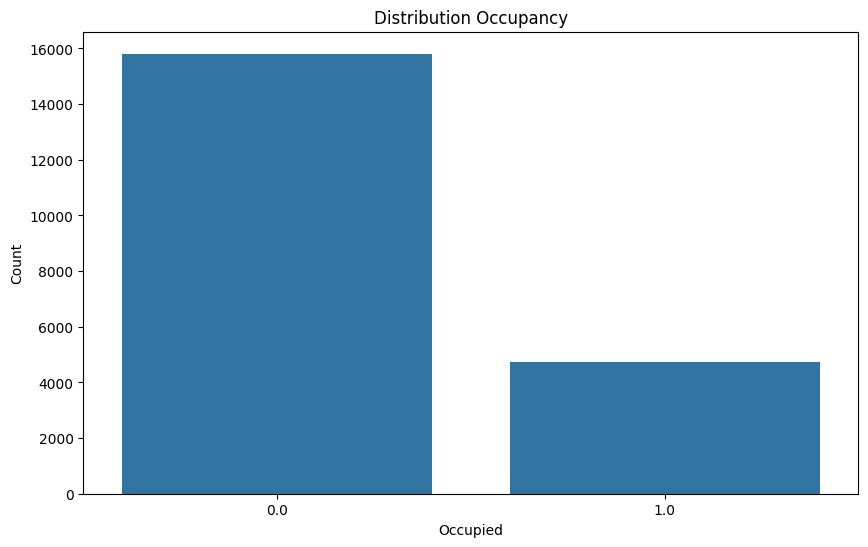

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Occupancy', data=data)
plt.title('Distribution Occupancy')
plt.xlabel('Occupied')
plt.ylabel('Count')
plt.show()

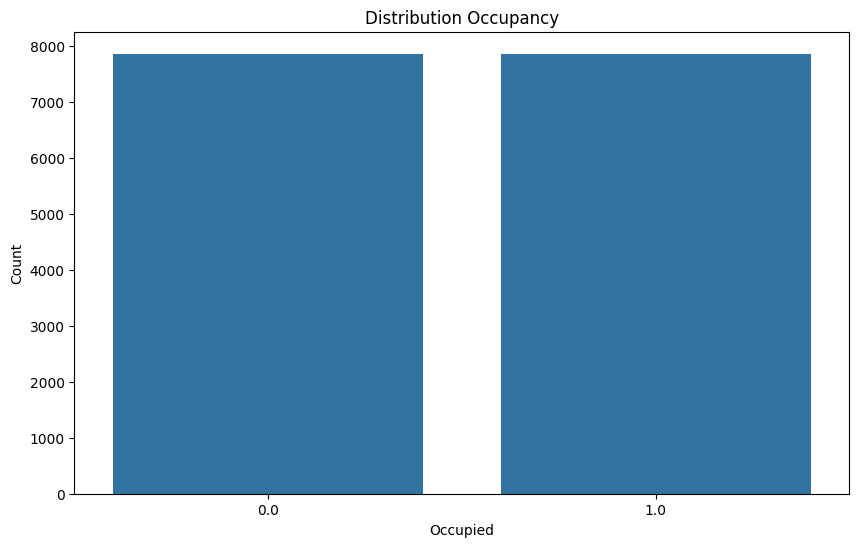

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Occupancy', data=pd.DataFrame(y_train_0))
plt.title('Distribution Occupancy')
plt.xlabel('Occupied')
plt.ylabel('Count')
plt.show()

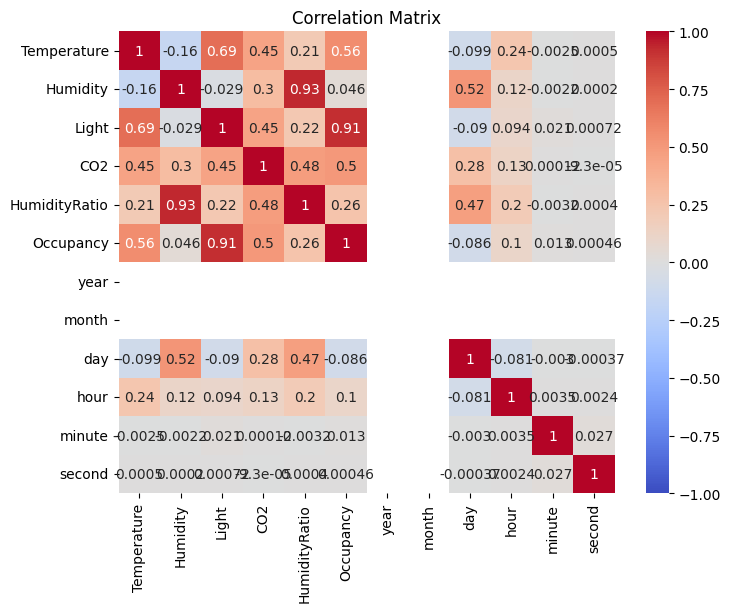

In [ ]:
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

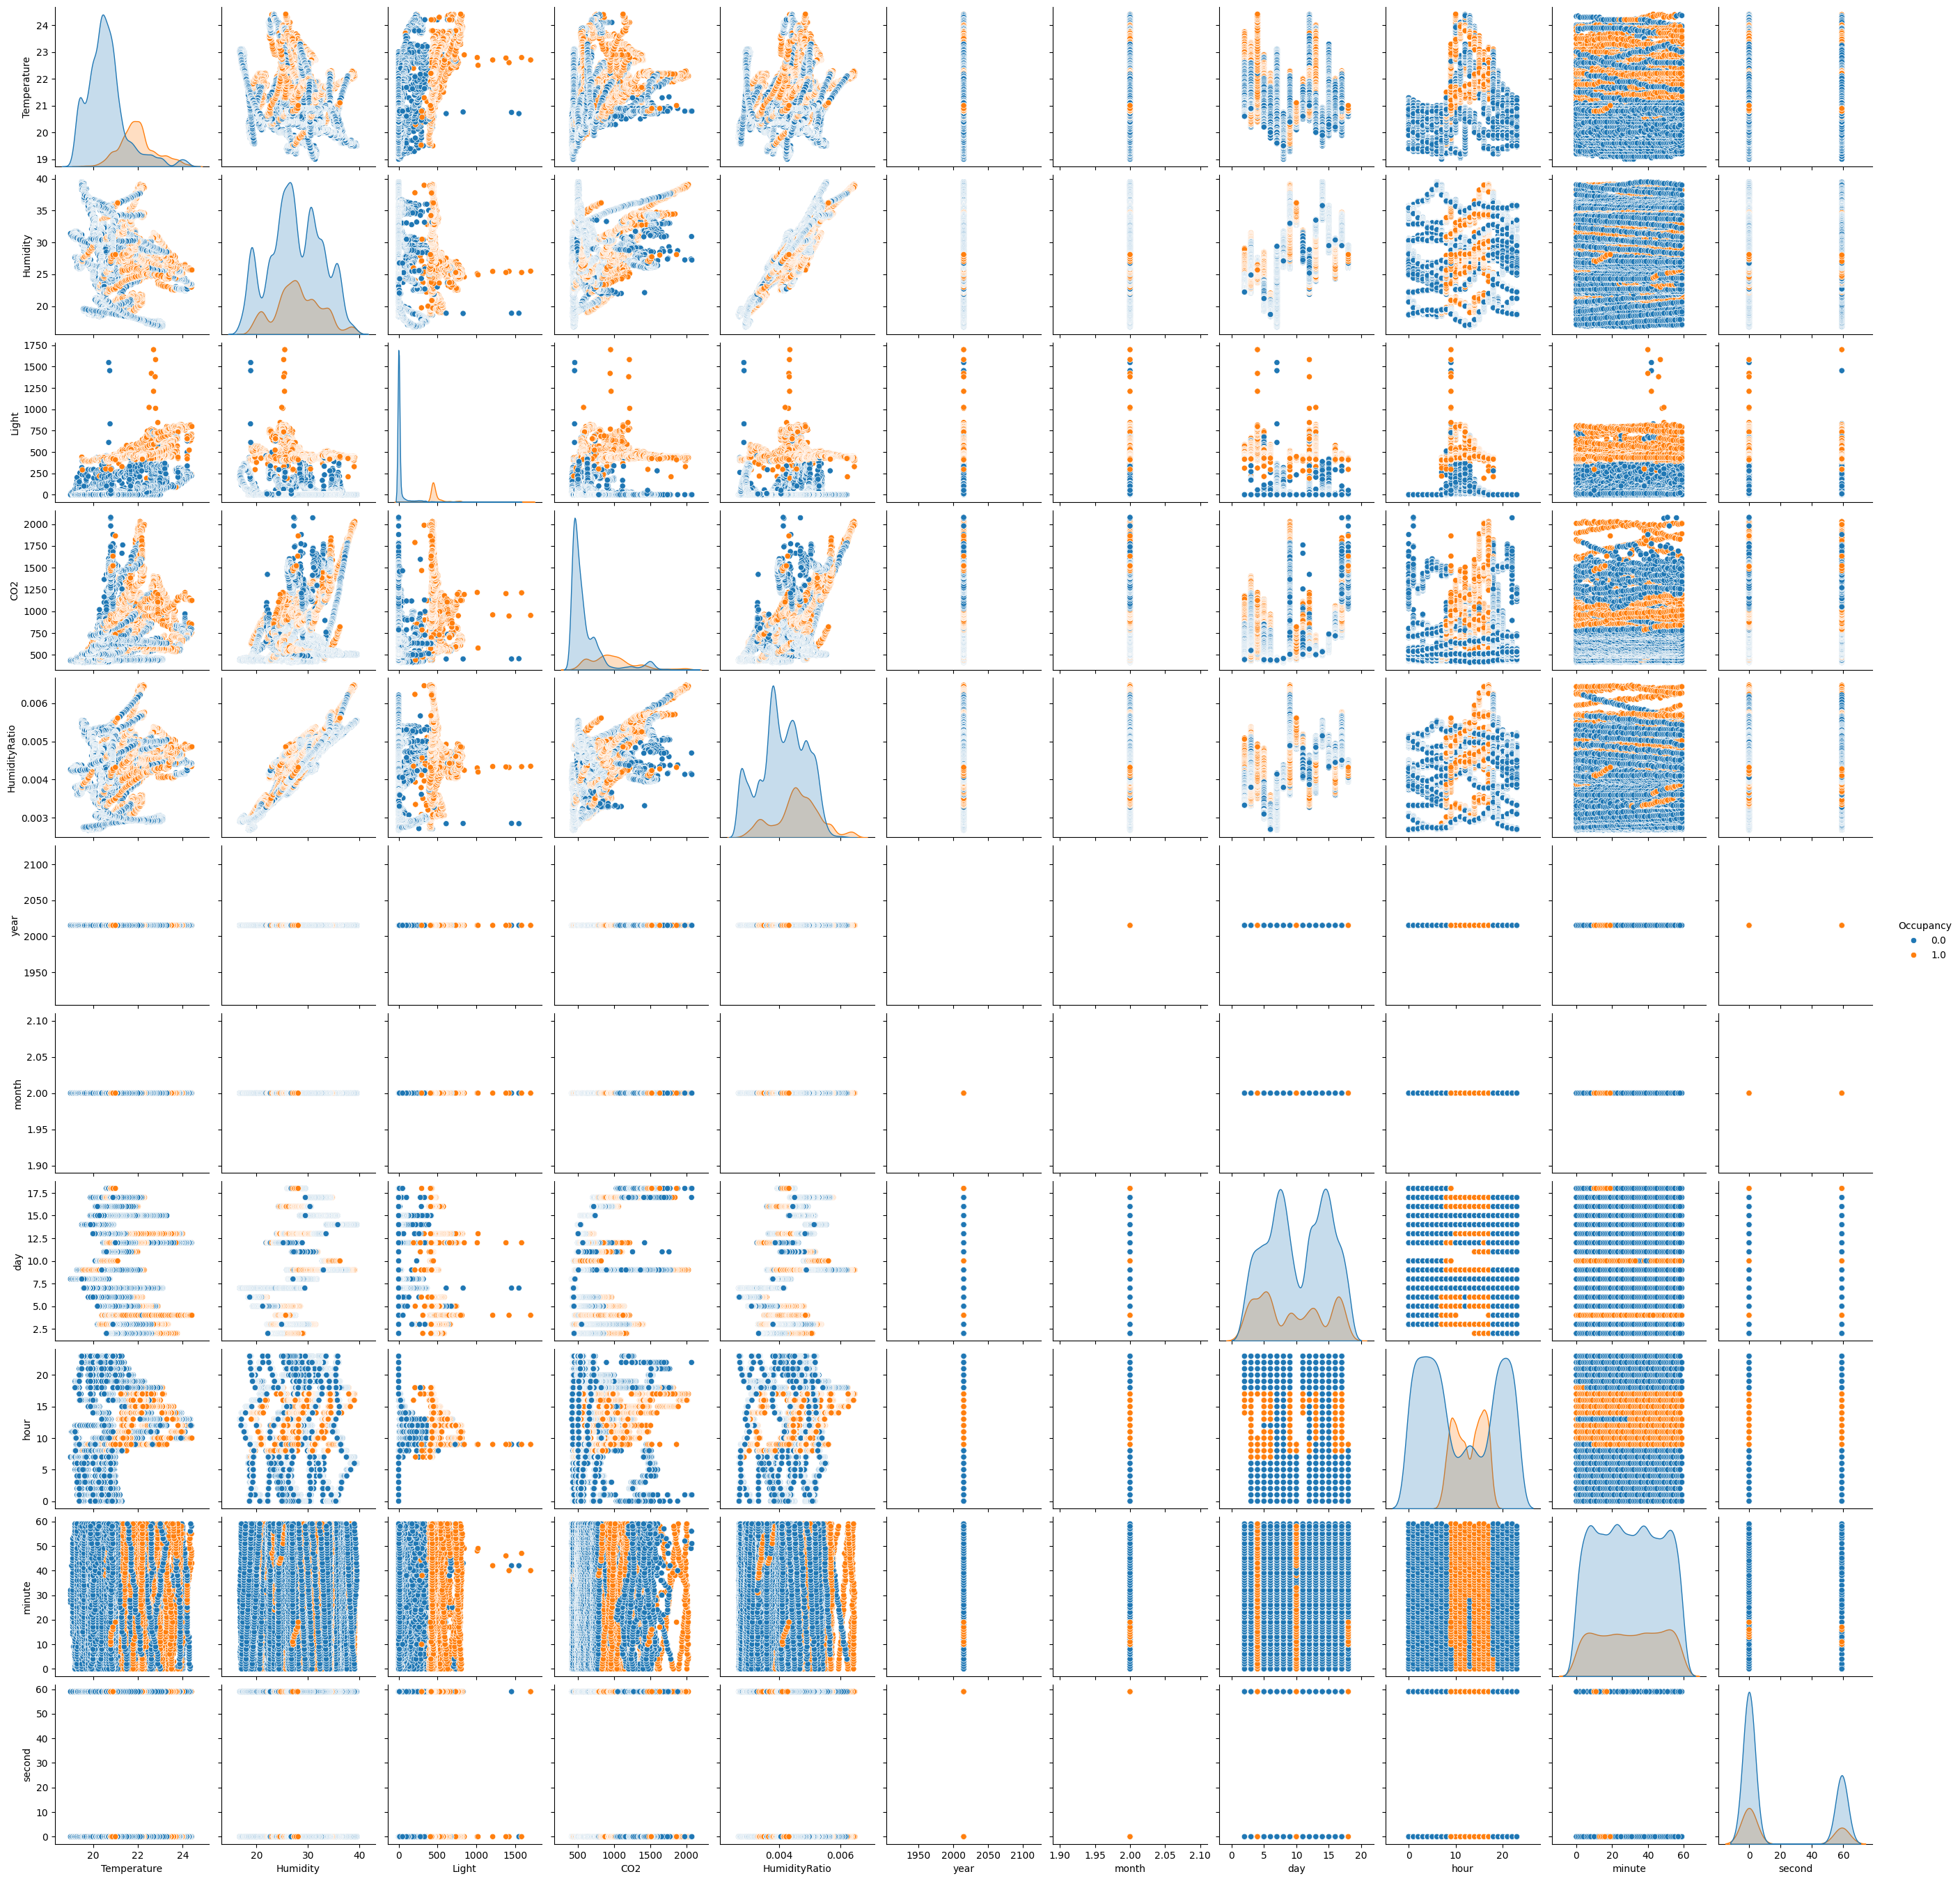

In [ ]:
sns.pairplot(data.drop('date', axis=1), hue='Occupancy')
plt.show()

## Occupation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [ ]:
X_test_0.head()

Temperature  Humidity  Light     CO2  HumidityRatio  year  month  day  \
17777        21.50    27.840  454.0  1019.5       0.004415  2015      2   16   
5971         19.50    27.525    0.0   451.0       0.003855  2015      2    8   
11806        20.50    22.445    0.0   734.5       0.003341  2015      2   12   
18116        21.79    29.790  429.0   934.5       0.004812  2015      2   16   
290          21.29    25.700    0.0   475.5       0.004021  2015      2    4   

       hour  minute  second  day_of_week  
17777    10      54      59            0  
5971     21      22       0            6  
11806     7      24       0            3  
18116    16      34       0            0  
290      22      40      59            2

In [ ]:
# Standardize the features
X_train_1 = X_train_0.drop('day_of_week', axis=1)
X_test_1 = X_test_0.drop('day_of_week', axis=1)

y_train = y_train_0
y_test = y_test_0

print(X_train_0.head())
print(X_train_1.head())

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_1)
X_test = scaler.transform(X_test_1)

# Initialize a list to store the results
results = {}

# Define a function to evaluate and store the results
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': roc_auc,
        'FPR': fpr,
        'TPR': tpr
    }
    print(pd.DataFrame({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': roc_auc,
    }, index=[0]))

   Temperature   Humidity       Light         CO2  HumidityRatio  year  month  \
0       20.100  32.200000    0.000000  566.000000       0.004687  2015      2   
1       19.700  37.200000    0.000000  502.000000       0.005287  2015      2   
2       19.000  31.390000    0.000000  439.000000       0.004264  2015      2   
3       20.675  35.240000   48.500000  498.250000       0.005320  2015      2   
4       21.200  21.066667  449.333333  789.666667       0.003274  2015      2   

   day  hour  minute  second  day_of_week  
0   15     5      25       0            6  
1   14     8      12       0            5  
2    8     7      28      59            6  
3   14    11      34       0            5  
4    6     9      40       0            4  
   Temperature   Humidity       Light         CO2  HumidityRatio  year  month  \
0       20.100  32.200000    0.000000  566.000000       0.004687  2015      2   
1       19.700  37.200000    0.000000  502.000000       0.005287  2015      2   
2     

## Logistic Regression


In [ ]:
lr_model = LogisticRegression(max_iter=300)
evaluate_model('Logistic Regression', lr_model, X_train, y_train, X_test, y_test)

                 Model  Accuracy  Precision    Recall  F1 Score       AUC
0  Logistic Regression   0.98823   0.952984  0.997433  0.974702  0.994396


In [ ]:
from sklearn.metrics import classification_report
y_pred = lr_model.predict(X_test)
coefs = lr_model.coef_[0] # Access the coefficients for the first class
feature_names = X_test_1.columns # Use X_test_1 because it has the same columns as the training data used for the model

for feature, coef in zip(feature_names, coefs):
    print(f"{feature}: {coef}")

Temperature: -1.5679644555842804
Humidity: -0.8172088886062391
Light: 6.271319982639371
CO2: 1.1898290408906316
HumidityRatio: 1.212281943529811
year: 0.0
month: 0.0
day: -0.24025413473672388
hour: 0.7388893647280252
minute: -0.2647218048087396
second: -0.0005470625742068364


## LDA

In [ ]:
evaluate_model('LDA', LinearDiscriminantAnalysis(), X_train, y_train, X_test, y_test)

  Model  Accuracy  Precision    Recall  F1 Score       AUC
0   LDA  0.985409   0.941105  0.998288  0.968854  0.993585


## QDA

In [ ]:
evaluate_model('QDA', QuadraticDiscriminantAnalysis(), X_train, y_train, X_test, y_test)

  Model  Accuracy  Precision    Recall  F1 Score       AUC
0   QDA  0.853502   0.756957  0.523748   0.61912  0.860324


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
data_train = pd.concat([X_train_0, y_train_0], axis=1)
data_test = pd.concat([X_test_0, y_test_0], axis=1)

# Drop highly correlated features
data_train.drop(columns=['Humidity'], inplace=True)

# One-hot encode time features
data_train = pd.get_dummies(data_train, columns=['hour', 'day_of_week', 'month'], dtype=int)

# Define features and labels after one-hot encoding
X_train_dummy = data_train.drop('Occupancy', axis=1)
y_train_dummy = data_train['Occupancy']

# X_test

data_test.drop(columns=['Humidity'], inplace=True)

data_test = pd.get_dummies(data_test, columns=['hour', 'day_of_week', 'month'], dtype=int)

X_test_dummy = data_test.drop('Occupancy', axis=1)
y_test_dummy = data_test['Occupancy']

evaluate_model('QDA', QuadraticDiscriminantAnalysis(), X_train_dummy, y_train_dummy, X_test_dummy, y_test_dummy)

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


  Model  Accuracy  Precision  Recall  F1 Score       AUC
0   QDA  0.895331   0.684735     1.0   0.81287  0.932267


## KNN

In [ ]:
evaluate_model('KNN', KNeighborsClassifier(), X_train, y_train, X_test, y_test)

  Model  Accuracy  Precision    Recall  F1 Score       AUC
0   KNN  0.990953    0.96556  0.995721  0.980409  0.997888


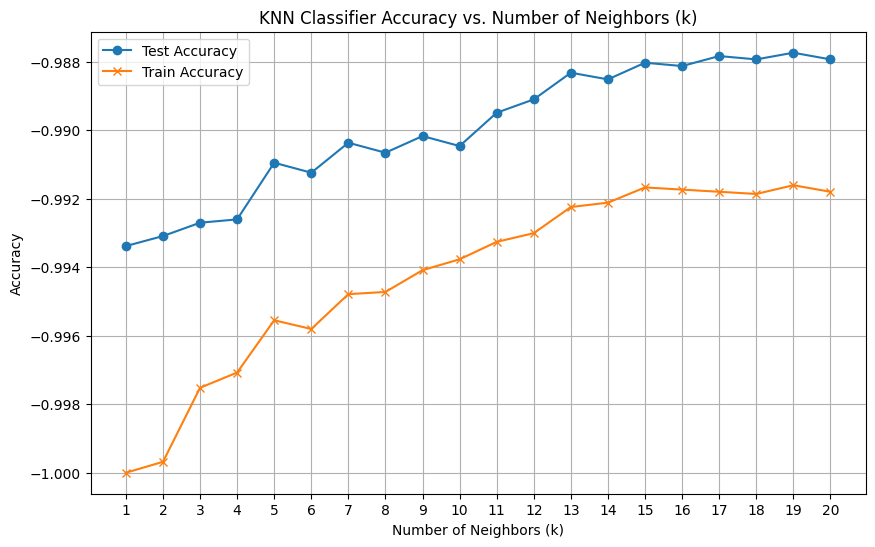

In [ ]:
k_values = range(1, 21)
test_accuracies = []
train_accuracies = []

# Loop over different values of k
for k in k_values:
    # Initialize the KNN classifier with the current k
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the model on the training data
    knn.fit(X_train, y_train)
    # Predict on the test data
    y_pred_test = knn.predict(X_test)
    # Predict on the train data
    y_pred_train = knn.predict(X_train)
    # Calculate the accuracy for test data
    test_accuracy = -accuracy_score(y_test, y_pred_test)
    # Calculate the accuracy for train data
    train_accuracy = -accuracy_score(y_train, y_pred_train)
    # Store the accuracies for the current k
    test_accuracies.append(test_accuracy)
    train_accuracies.append(train_accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, test_accuracies, marker='o', label='Test Accuracy')
plt.plot(k_values, train_accuracies, marker='x', label='Train Accuracy')
plt.title('KNN Classifier Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
evaluate_model('RandomForest', rf_model, X_train, y_train, X_test, y_test)

          Model  Accuracy  Precision    Recall  F1 Score       AUC
0  RandomForest  0.993482   0.978096  0.993582  0.985778  0.999483


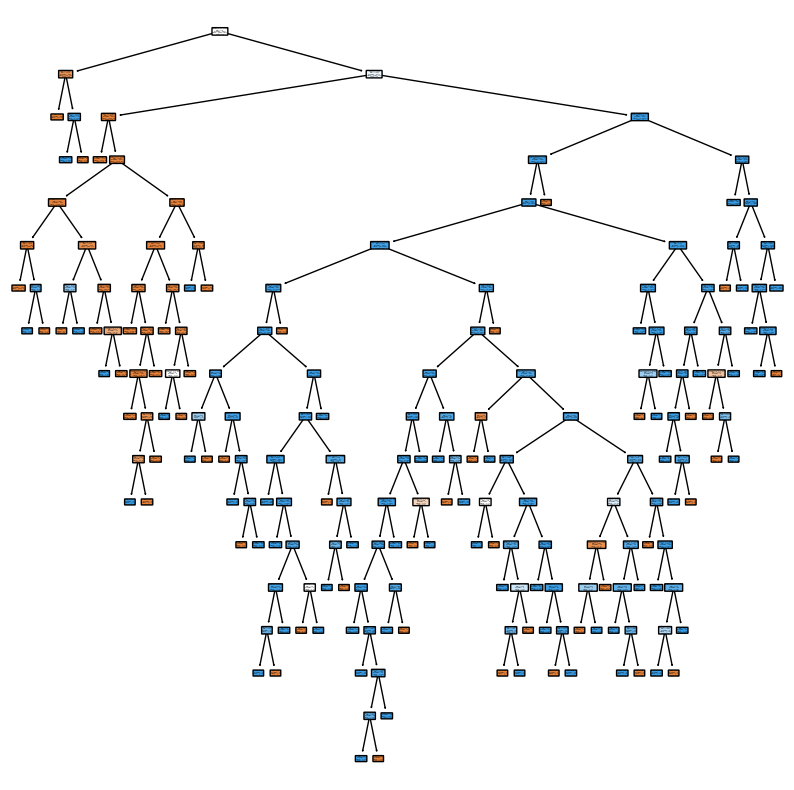

In [ ]:
from sklearn.tree import plot_tree, export_graphviz

# Extract a single tree from the Random Forest
tree = rf_model.estimators_[0]

# Visualize the tree using matplotlib
plt.figure(figsize=(10, 10))
plot_tree(tree, feature_names=X_train_1.columns, class_names=np.unique(y_train).astype(str), filled=True, rounded=True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': np.arange(1, 13),  # Explore different pruning levels
}

rf_model_opt = RandomForestClassifier()

grid_search = GridSearchCV(rf_model_opt, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Extract the results from the grid search
best_results = grid_search.cv_results_
ccp_alphas = best_results['param_max_depth'].data
mean_train_scores = -best_results['mean_train_score']
mean_test_scores = -best_results['mean_test_score']

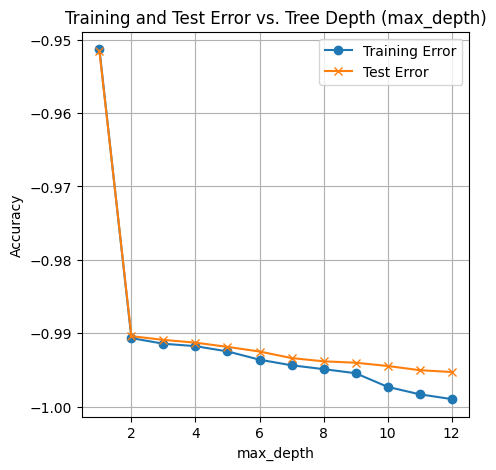

In [ ]:
# Create a plot for test error and training error
plt.figure(figsize=(5, 5))
plt.plot(ccp_alphas, mean_train_scores, label='Training Error', marker='o')
plt.plot(ccp_alphas, mean_test_scores, label='Test Error', marker='x')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Training and Test Error vs. Tree Depth (max_depth)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
rf_model = RandomForestClassifier(max_depth=2)
evaluate_model('RandomForest', rf_model, X_train, y_train, X_test, y_test)

          Model  Accuracy  Precision    Recall  F1 Score       AUC
0  RandomForest  0.988911   0.957973  0.994865  0.976071  0.992733


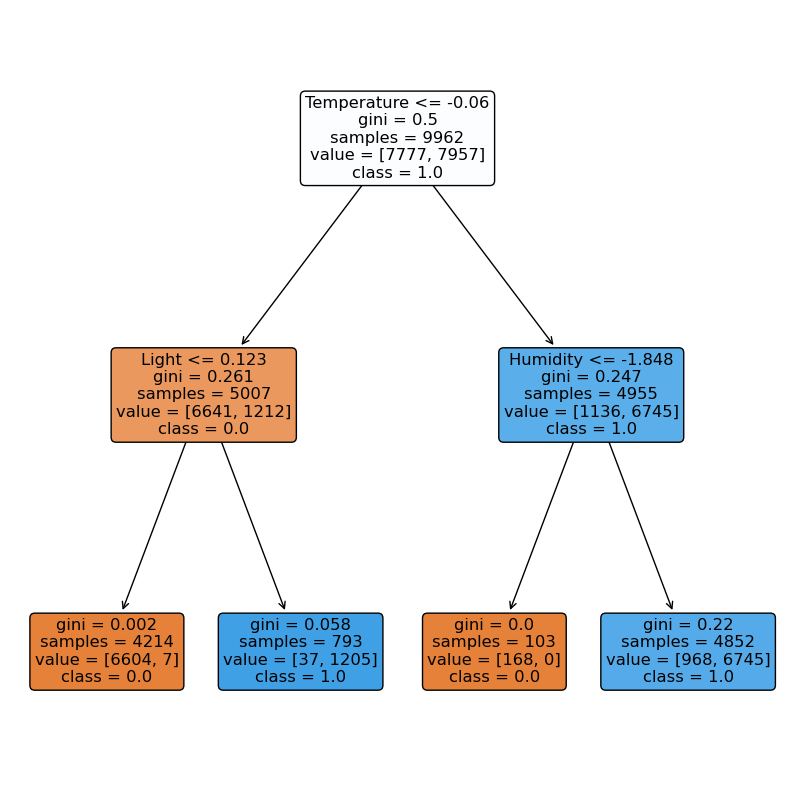

In [ ]:
from sklearn.tree import plot_tree, export_graphviz

# Extract a single tree from the Random Forest
tree = rf_model.estimators_[0]

# Visualize the tree using matplotlib
plt.figure(figsize=(10, 10))
plot_tree(tree, feature_names=X_train_1.columns, class_names=np.unique(y_train).astype(str), filled=True, rounded=True)
plt.show()

## MLP

In [ ]:
evaluate_model(f'MLP with {solver}', MLPClassifier(solver='adam', max_iter=300), X_train, y_train, X_test, y_test)

           Model  Accuracy  Precision    Recall  F1 Score      AUC
0  MLP with adam  0.989883   0.960033  0.997005   0.97817  0.99881


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


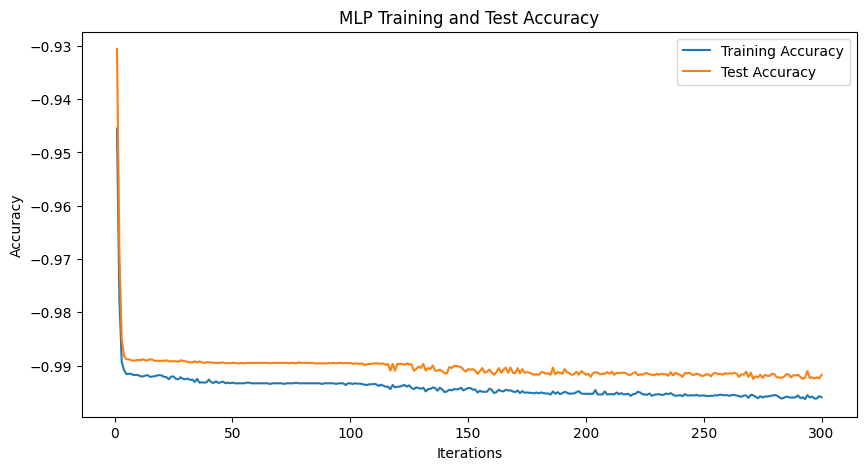

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Initialize the MLPClassifier with the desired solver
mlp = MLPClassifier(solver='adam', max_iter=1, warm_start=True)

# Variables to store the accuracy at each step
train_accuracies = []
test_accuracies = []
iterations = 300  # Number of iterations

# Incremental training
for i in range(iterations):
    mlp.fit(X_train, y_train)
    train_pred = mlp.predict(X_train)
    test_pred = mlp.predict(X_test)
    train_acc = -accuracy_score(y_train, train_pred)
    test_acc = -accuracy_score(y_test, test_pred)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotting the training and test accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, iterations + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, iterations + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('MLP Training and Test Accuracy')
plt.legend()
plt.show()


## Comparsion

In [ ]:
# Convert results to a DataFrame, transposing to get desired columns
results_df = pd.DataFrame(results).transpose()

# Rename columns for consistency
results_df = results_df.rename(columns={0: 'Accuracy', 1: 'Precision', 2: 'Recall', 3: 'F1 Score', 4: 'AUC'})

# Add a 'Model' column
results_df['Model'] = results_df.index

# Display the results
print(results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']])

                     Accuracy Precision    Recall  F1 Score       AUC
Logistic Regression   0.98823  0.952984  0.997433  0.974702  0.994396
LDA                  0.985409  0.941105  0.998288  0.968854  0.993585
QDA                  0.895331  0.684735       1.0   0.81287  0.932267
KNN                  0.990953   0.96556  0.995721  0.980409  0.997888
RandomForest         0.988911  0.957973  0.994865  0.976071  0.992733
MLP with adam        0.989883  0.960033  0.997005   0.97817   0.99881


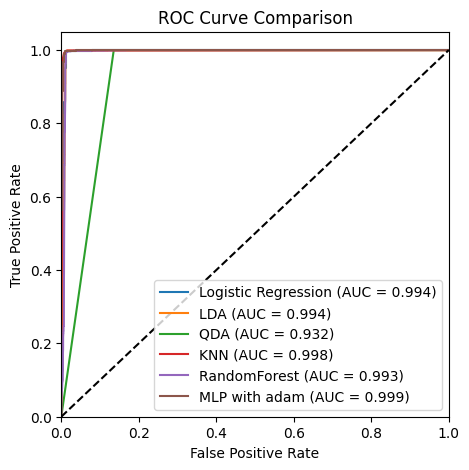

In [ ]:
# Plot ROC curves
plt.figure(figsize=(5, 5))
for result in results:
    plt.plot(results[result]['FPR'], results[result]['TPR'], label=f"{results[result]['Model']} (AUC = {results[result]['AUC']:.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

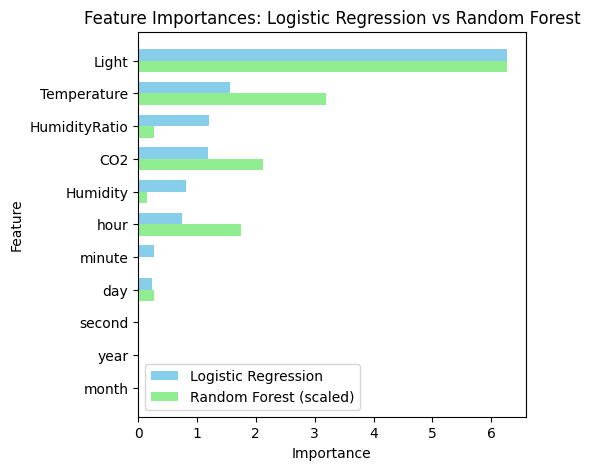

In [ ]:
# Get feature names if available, else generate feature indices
feature_names = X_train_1.columns

# Logistic Regression Feature Importances
lr_importances = np.abs(lr_model.coef_[0])
lr_feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'LR Importance': lr_importances
}).sort_values(by='LR Importance', ascending=False)

# Random Forest Feature Importances
rf_importances = rf_model.feature_importances_
rf_feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'RF Importance': rf_importances
})

# Merge dataframes to align features
feature_importance_df = pd.merge(lr_feature_importance_df, rf_feature_importance_df, on='Feature', how='outer').fillna(0)

# Multiply Random Forest importances by 10
scaling_factor = feature_importance_df['LR Importance'][feature_importance_df['LR Importance'].idxmax()] / feature_importance_df['RF Importance'][feature_importance_df['RF Importance'].idxmax()]
feature_importance_df['RF Importance'] *= scaling_factor

# Plot combined feature importances following the order of Logistic Regression
plt.figure(figsize=(5, 5))
bar_width = 0.35
index = np.arange(len(feature_importance_df))

plt.barh(index, feature_importance_df['LR Importance'], bar_width, label='Logistic Regression', color='skyblue')
plt.barh(index + bar_width, feature_importance_df['RF Importance'], bar_width, label='Random Forest (scaled)', color='lightgreen')

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances: Logistic Regression vs Random Forest')
plt.yticks(index + bar_width / 2, feature_importance_df['Feature'])
plt.gca().invert_yaxis()
plt.legend()

plt.show()

In [ ]:
feature_importance_df['LR Importance'][feature_importance_df['LR Importance'].idxmax()] / feature_importance_df['RF Importance'].idxmax()
feature_importance_df['RF Importance'] *= scaling_factor

5.108435686255147

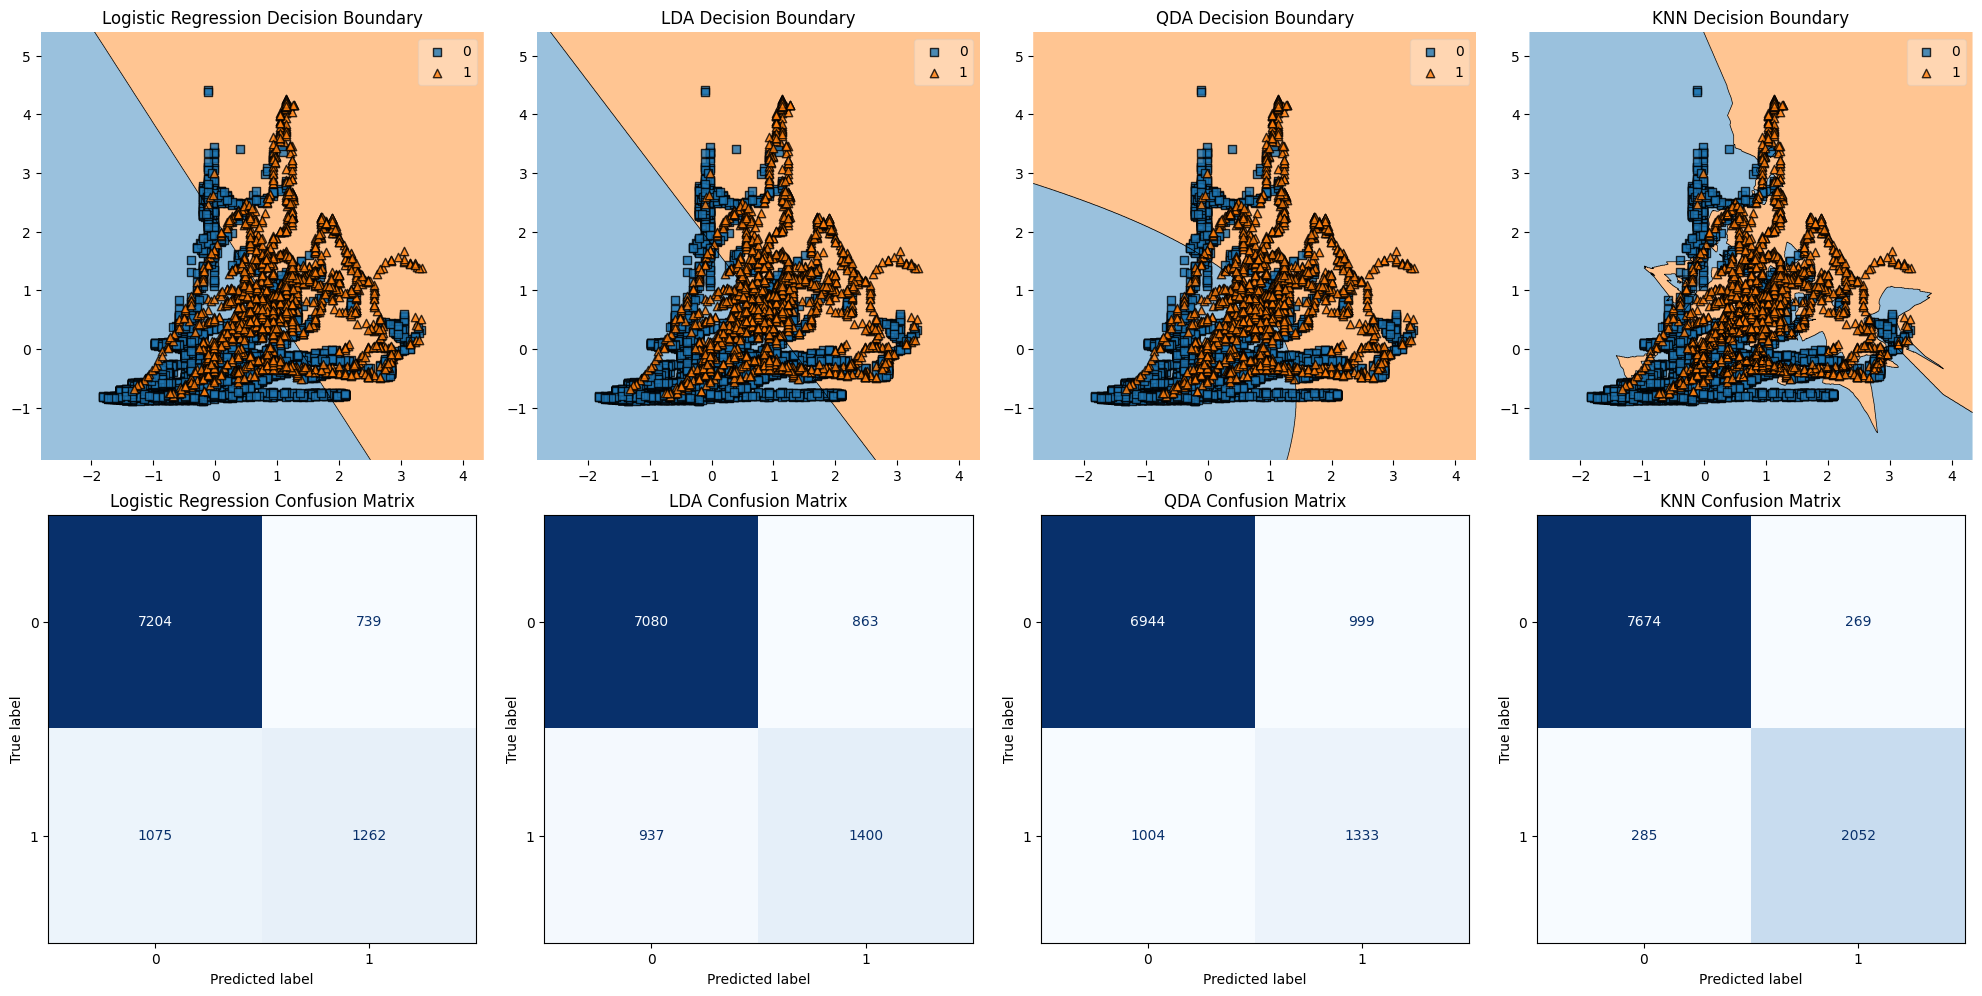

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from mlxtend.plotting import plot_decision_regions

data = df.copy()

# Convert columns to numeric types with error handling
columns_to_convert = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']

for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Drop rows with NaN values
data.dropna(inplace=True)

# Convert date-time to datetime object and extract features
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data = data.dropna(subset=['date'])

data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['hour'] = data['date'].dt.hour
data['minute'] = data['date'].dt.minute
data['second'] = data['date'].dt.second

# Drop the original date column
data.drop('date', axis=1, inplace=True)

# Define features and labels
X = data.drop('Occupancy', axis=1)
y = data['Occupancy']

# For visualization purposes, reduce the dimensionality of the dataset to 2 features
X = X[['Temperature', 'CO2']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train models
models = {
    'Logistic Regression': LogisticRegression(max_iter=300),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'KNN': KNeighborsClassifier()
}

# Plot decision boundaries and confusion matrices
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Plot decision boundary
    plot_decision_regions(X_test, y_test.to_numpy().astype(int), clf=model, ax=axes[0, idx])
    axes[0, idx].set_title(f'{name} Decision Boundary')

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[1, idx], cmap='Blues', colorbar=False)
    axes[1, idx].set_title(f'{name} Confusion Matrix')

plt.tight_layout()
plt.show()

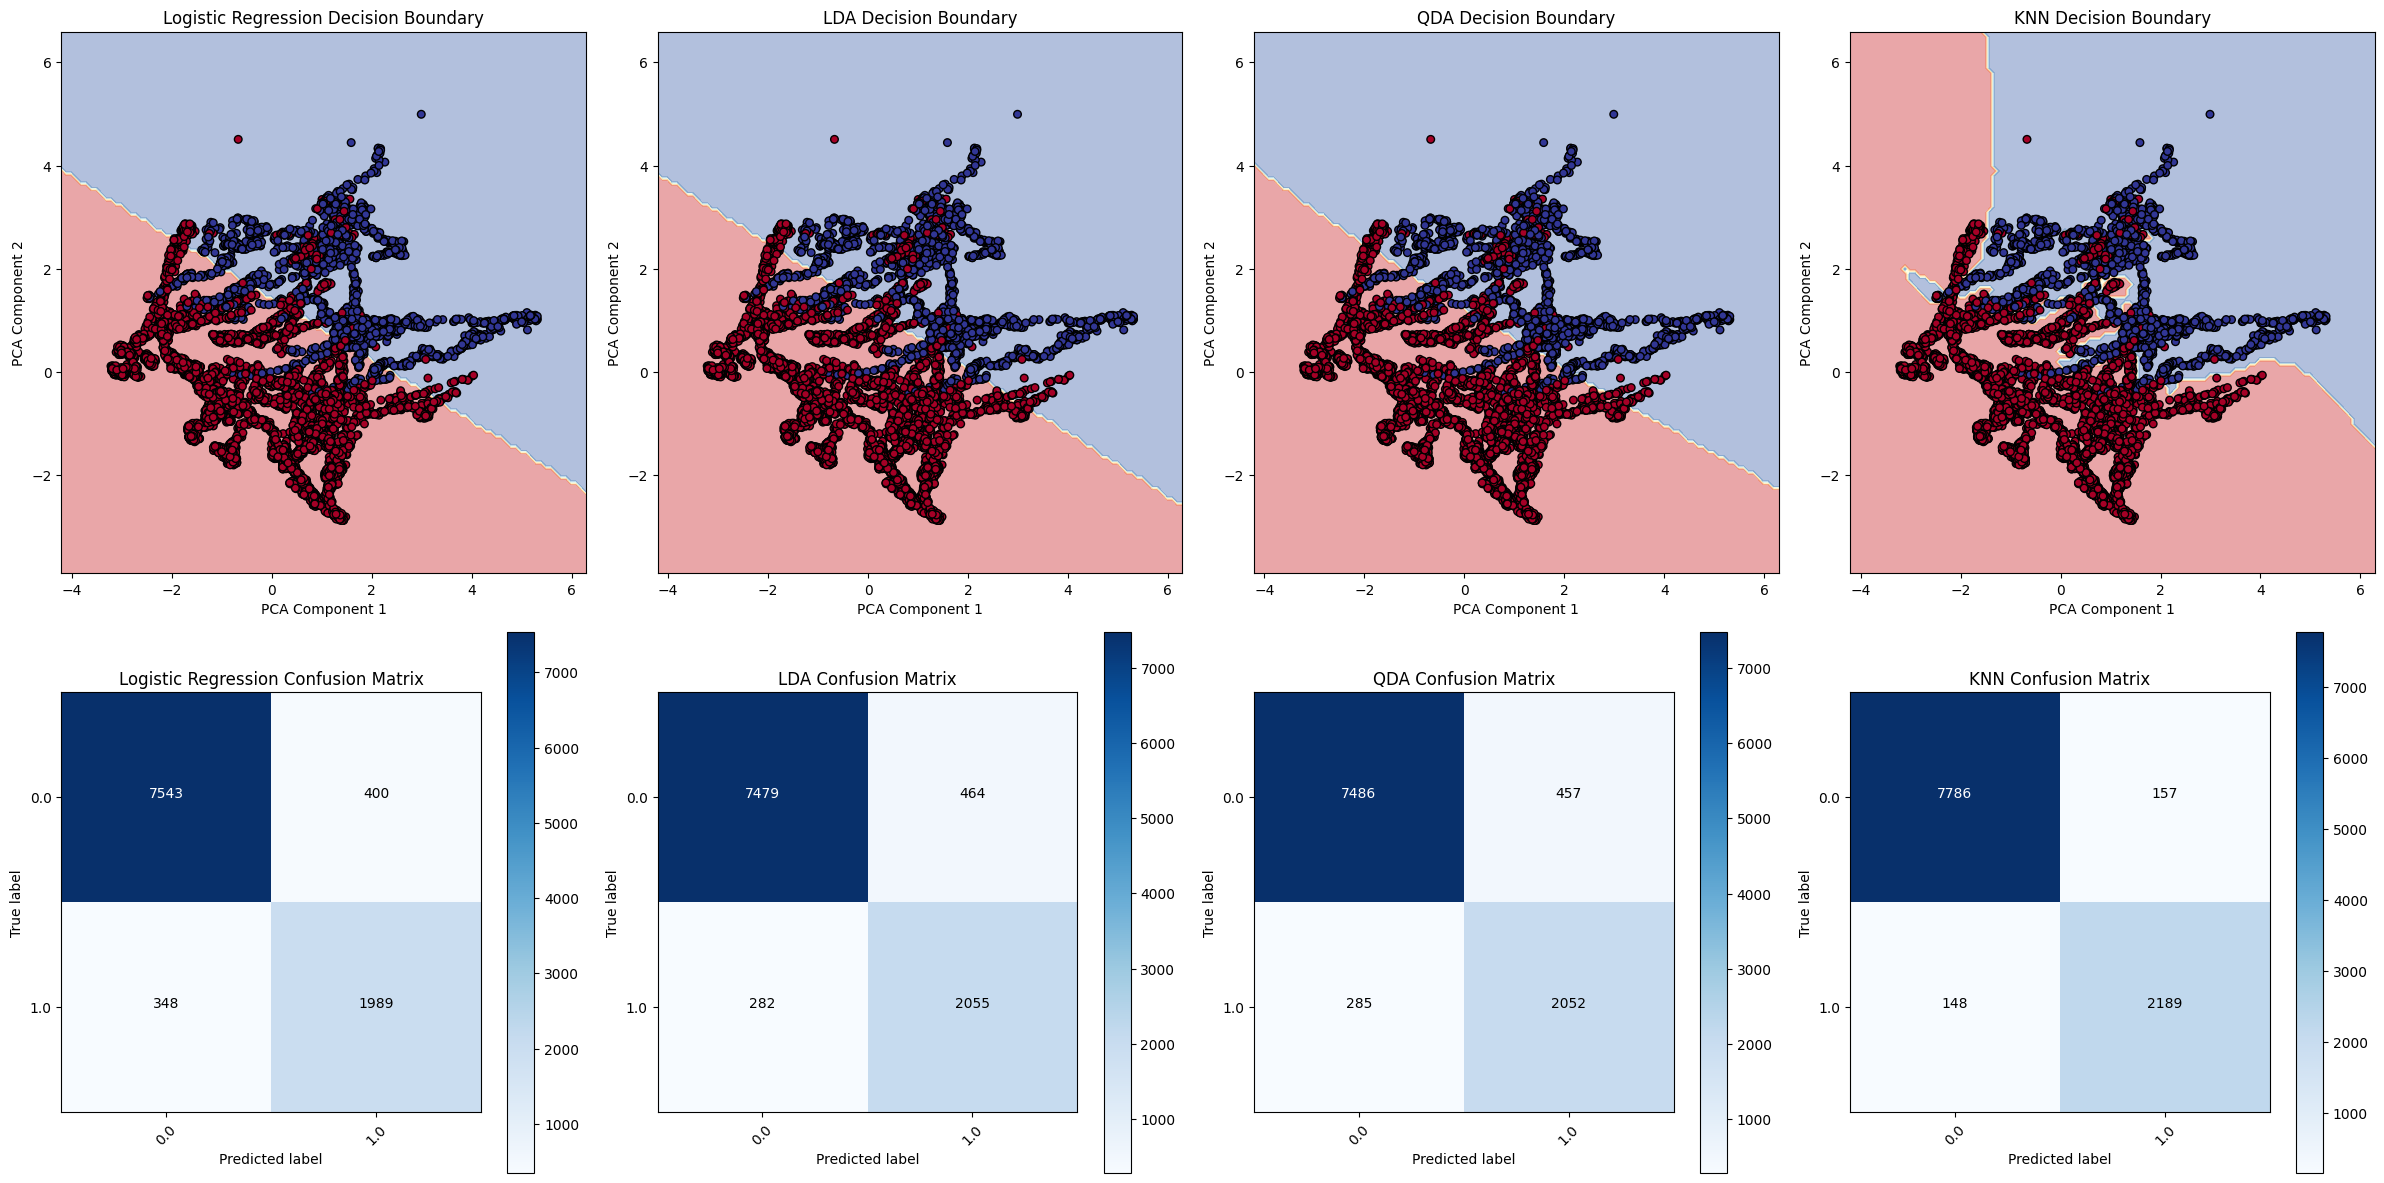

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming X_train_1, X_test_1, y_train, y_test are already defined
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_1)
X_test = scaler.transform(X_test_1)

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=300),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Plot decision boundaries and confusion matrices
plt.figure(figsize=(24, 12))

for i, (name, model) in enumerate(models.items(), 1):
    # Train the model
    model.fit(X_train_pca, y_train)

    # Plot the decision boundary
    plt.subplot(2, 4, i)
    x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
    y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

    # Scatter plot of test points
    scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, s=30, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title(f'{name} Decision Boundary')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')

    # Predict and print confusion matrix
    y_pred = model.predict(X_test_pca)
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(2, 4, i+4)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'{name} Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, np.unique(y_test), rotation=45)
    plt.yticks(tick_marks, np.unique(y_test))

    for j, k in np.ndindex(cm.shape):
        plt.text(k, j, cm[j, k], horizontalalignment="center", color="white" if cm[j, k] > cm.max() / 2 else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.tight_layout()
plt.show()
